In [3]:
#Scenario: You are a Data Scientist working for a consulting firm. One of your  colleagues from the Auditing department has asked you to help them assess the financial statement of organisation X.
#You have been supplied with two lists of data: monthly revenue and monthly expenses for the financial year in question. Your task is to calculate the following 
#financial metrics:
#- profit for each month
#- profit after tax for each month (the tax rate is 30%)
#- profit margin for each month - equals to profit after tax divided by revenue
#- good months - where the profit after tax was greater than the mean for the year
#- bad months - where the profit after tax was less than the mean for the year
#- the best month - where the profit after tax was max for the year
#- the worst month - where the profit after tax was min for the year
#All results need to be presented as lists.
##presented in Units of $1,000 (i.e. 1k) with no decimal points.
#Results for the profit margin ratio need to be presented in units of % with no decimal points.
#Note: Your colleague has warned you that it is okay for tax for any given month to be negative (in accounting terms, negative tax translates into a deferred tax asset).
        

In [4]:
revenue = [{'Jan': 14574.49, 'Feb': 7606.46, 'March': 8611.41, 'April': 9175.41, 'May': 8058.65, 'June': 8105.44, 'July': 11496.28, 'August': 9766.09, 'Sept': 10305.32, 'Oct': 14379.96, 'Nov': 10713.97, 'Dec': 15433.50}]
expenses = [{'Jan': 12051.82, 'Feb': 5695.07, 'March': 12319.20, 'April': 12089.72, 'May': 8658.57,'June': 840.20, 'July': 3285.73, 'August': 5821.12, 'Sept': 6976.93, 'Oct': 16618.61,'Nov': 10054.37, 'Dec':  3803.96}]
months = ['Jan', 'Feb', 'March', 'April', 'May', 'June', 'July', 'August', 'Sept', 'Oct', 'Nov', 'Dec']

In [6]:
import numpy as np 

In [7]:
revenue_array = np.array(revenue)
print(revenue)

[14574.49, 7606.46, 8611.41, 9175.41, 8058.65, 8105.44, 11496.28, 9766.09, 10305.32, 14379.96, 10713.97, 15433.5]


In [9]:
expenses_array = np.array(expenses)
print(expenses_array)

[12051.82  5695.07 12319.2  12089.72  8658.57   840.2   3285.73  5821.12
  6976.93 16618.61 10054.37  3803.96]


In [12]:
profit = []
for i in range(0, len(revenue)):
    profit.append(round(revenue[i] - expenses[i], 2))
print(profit)

[2522.67, 1911.39, -3707.79, -2914.31, -599.92, 7265.24, 8210.55, 3944.97, 3328.39, -2238.65, 659.6, 11629.54]


In [26]:
profit_after_tax = [round(p * (1-0.3), 2) for p in profit]


In [29]:
profit_margin = [round(pat / r, 3) * 100 for pat, r in zip(profit_after_tax, revenue)] 

In [31]:
mean = sum(profit_after_tax)/len(profit_after_tax)


In [42]:
good_months = [month + 0 for month, profit_after_tax in enumerate(profit_after_tax) if profit_after_tax > mean]

In [43]:
bad_months = [month + 0 for month, profit_after_tax in enumerate(profit_after_tax) if profit_after_tax < mean]
bad_months

[1, 2, 3, 4, 9, 10]

In [45]:
The_Best_Month = [profit_after_tax.index(max(profit_after_tax))]

[11]

In [46]:
The_Worst_Month = [profit_after_tax.index(min(profit_after_tax))]

[2]

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

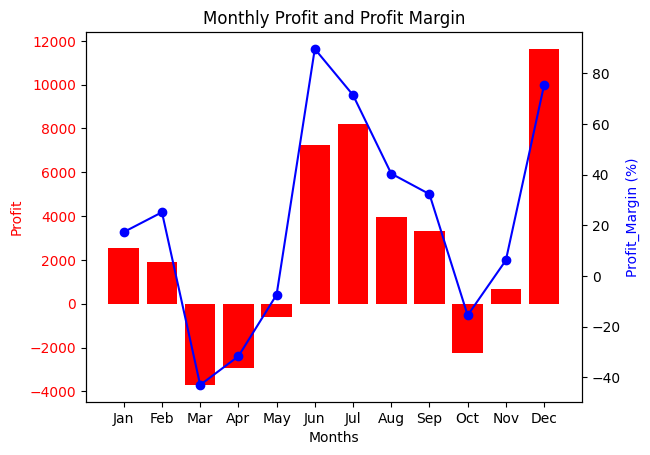

In [71]:
f, ax1 = plt.subplots()
ax1.bar(months, profit, color='Red')
ax1.set_xlabel('Months')
ax1.set_ylabel('Profit', color='Red')
ax1.tick_params(axis = 'y', labelcolor='Red')
ax2 = ax1.twinx()
ax2.plot(months, profit_margin, marker='o', color='Blue')
ax2.set_ylabel('Profit_Margin (%)', color='Blue')
plt.title('Monthly Profit and Profit Margin')
plt.show()
